In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

In [2]:
bike_ride_df = pd.read_csv(
    "data/202102-capitalbikeshare-tripdata.csv",
    parse_dates=["started_at", "ended_at"],
    low_memory=False
)

bike_ride_df = bike_ride_df.sort_values(by=["started_at"]).reset_index(drop=True)

bike_ride_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,D2050846006839DA,electric_bike,2021-02-01 00:01:52,2021-02-01 00:07:59,NaN,NaN,NaN,NaN,38.930000,-77.040000,38.920000,-77.020000,casual
1,098FB62FD62B934E,classic_bike,2021-02-01 00:01:57,2021-02-01 00:13:49,Wisconsin Ave & Newark St NW,31302,Connecticut Ave & Yuma St NW,31318,38.934881,-77.072755,38.947156,-77.065115,casual
2,EBF7D7A350DB17E3,electric_bike,2021-02-01 00:04:42,2021-02-01 00:17:35,Lynn St & 19th St North,31014,23rd & M St NW,31128,38.897266,-77.070785,38.905247,-77.050538,member
3,4CE555AB8B39EF3D,electric_bike,2021-02-01 00:16:50,2021-02-01 00:29:14,14th & Rhode Island Ave NW,31203,7th & E St SW,31294,38.908557,-77.032525,38.883513,-77.021682,casual
4,BCE8D657317ACCB2,electric_bike,2021-02-01 00:21:57,2021-02-01 00:37:54,NaN,NaN,NaN,NaN,38.920000,-77.070000,38.900000,-77.050000,casual


In [3]:
bike_ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77505 entries, 0 to 77504
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             77505 non-null  object        
 1   rideable_type       77505 non-null  object        
 2   started_at          77505 non-null  datetime64[ns]
 3   ended_at            77505 non-null  datetime64[ns]
 4   start_station_name  69210 non-null  object        
 5   start_station_id    69210 non-null  object        
 6   end_station_name    68193 non-null  object        
 7   end_station_id      68193 non-null  object        
 8   start_lat           77503 non-null  float64       
 9   start_lng           77503 non-null  float64       
 10  end_lat             77399 non-null  float64       
 11  end_lng             77399 non-null  float64       
 12  member_casual       77505 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(7)
me

In [4]:
def unique_value_count(df: pd.DataFrame):
    df_nunique = df.nunique().reset_index()
    df_nunique['dtype'] = df.dtypes.reset_index().loc[:, 0]
    df_nunique.columns = ['column', 'nunique', 'dtype']
    
    display(df_nunique)

In [5]:
unique_value_count(df=bike_ride_df)

,column,nunique,dtype
0,ride_id,77505,object
1,rideable_type,3,object
2,started_at,74903,datetime64[ns]
3,ended_at,74779,datetime64[ns]
4,start_station_name,608,object
5,start_station_id,608,object
6,end_station_name,600,object
7,end_station_id,600,object
8,start_lat,14036,float64
9,start_lng,14168,float64


In [6]:
bike_ride_df = bike_ride_df.drop(columns=["ride_id"], errors="ignore")

## Feature Engineering

In [7]:
trip_duration_lambda = lambda timedelta_unit: np.round(
    np.abs(
        np.subtract(
            bike_ride_df.ended_at,
            bike_ride_df.started_at,
        )
    ) / pd.Timedelta(timedelta_unit), 4
)

bike_ride_df["trip_duration_days"] = trip_duration_lambda(timedelta_unit="1 day")
bike_ride_df["trip_duration_hours"] = trip_duration_lambda(timedelta_unit="1 hour")
bike_ride_df["trip_duration_minutes"] = trip_duration_lambda(timedelta_unit="1 min")
bike_ride_df["trip_duration_seconds"] = trip_duration_lambda(timedelta_unit="1 sec")

bike_ride_df["trip_start_date"] = bike_ride_df.started_at.dt.date

In [8]:
bike_ride_df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration_days,trip_duration_hours,trip_duration_minutes,trip_duration_seconds,trip_start_date
0,electric_bike,2021-02-01 00:01:52,2021-02-01 00:07:59,NaN,NaN,NaN,NaN,38.930000,-77.040000,38.920000,-77.020000,casual,0.0042,0.1019,6.1167,367.0,2021-02-01
1,classic_bike,2021-02-01 00:01:57,2021-02-01 00:13:49,Wisconsin Ave & Newark St NW,31302,Connecticut Ave & Yuma St NW,31318,38.934881,-77.072755,38.947156,-77.065115,casual,0.0082,0.1978,11.8667,712.0,2021-02-01
2,electric_bike,2021-02-01 00:04:42,2021-02-01 00:17:35,Lynn St & 19th St North,31014,23rd & M St NW,31128,38.897266,-77.070785,38.905247,-77.050538,member,0.0089,0.2147,12.8833,773.0,2021-02-01
3,electric_bike,2021-02-01 00:16:50,2021-02-01 00:29:14,14th & Rhode Island Ave NW,31203,7th & E St SW,31294,38.908557,-77.032525,38.883513,-77.021682,casual,0.0086,0.2067,12.4000,744.0,2021-02-01
4,electric_bike,2021-02-01 00:21:57,2021-02-01 00:37:54,NaN,NaN,NaN,NaN,38.920000,-77.070000,38.900000,-77.050000,casual,0.0111,0.2658,15.9500,957.0,2021-02-01


In [9]:
bike_ride_df.rideable_type.value_counts()

classic_bike     52263
electric_bike    22481
docked_bike       2761
Name: rideable_type, dtype: int64

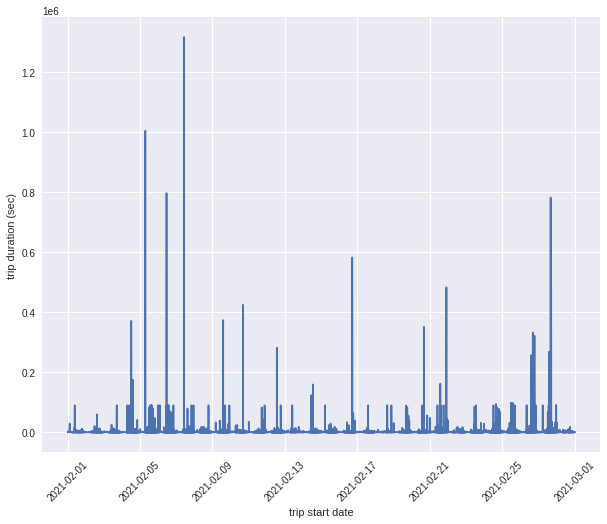

In [10]:
plt.figure(figsize=(10, 8))

plt.plot(bike_ride_df.started_at, bike_ride_df.trip_duration_seconds)
plt.xticks(rotation=45)

plt.xlabel("trip start date")
plt.ylabel("trip duration (sec)")
plt.show()

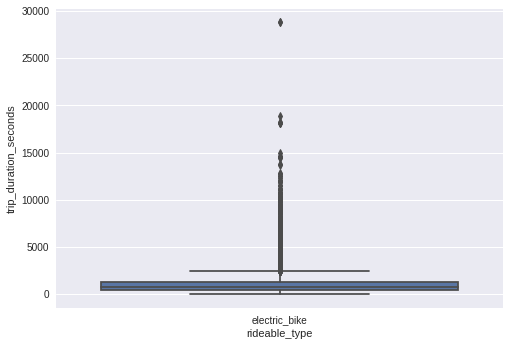

In [11]:
sns.boxplot(
    x="rideable_type", 
    y="trip_duration_seconds",
    data=bike_ride_df.loc[
        bike_ride_df.rideable_type == "electric_bike", ["rideable_type", "trip_duration_seconds"]
    ]
)

plt.show()

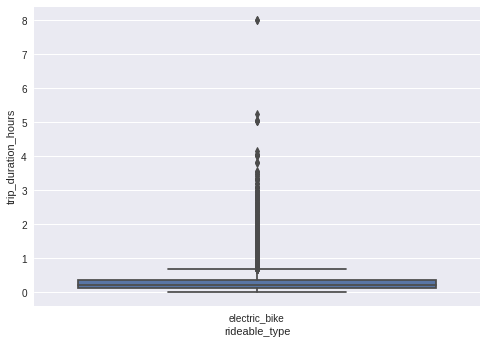

In [12]:
sns.boxplot(
    x="rideable_type", 
    y="trip_duration_hours",
    data=bike_ride_df.loc[
        bike_ride_df.rideable_type == "electric_bike", ["rideable_type", "trip_duration_hours"]
    ]
)

plt.show()

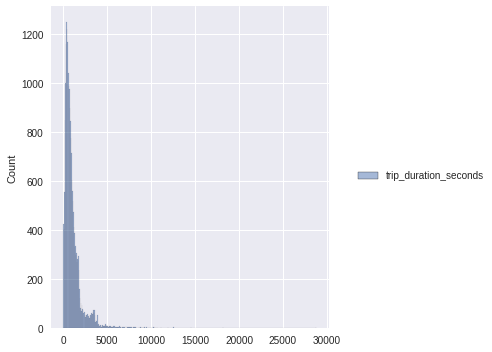

In [17]:
sns.displot(bike_ride_df.loc[
    bike_ride_df.rideable_type == "electric_bike", ["rideable_type", "trip_duration_seconds"]
    ])
plt.show()

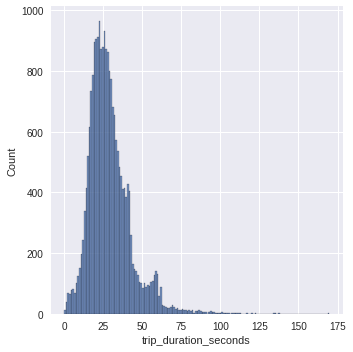

In [18]:
sns.displot(
    np.sqrt(
        bike_ride_df.loc[
            bike_ride_df.rideable_type == "electric_bike", "trip_duration_seconds"
        ]
    )
)

plt.show()